### Load packages

In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Load data

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")

## Variable names and descriptions

- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  - A: The borrower has a high creditworthiness, indicating low risk.
  - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  - C: The borrower's creditworthiness is moderate.
  - D: The borrower is considered to have higher risk compared to previous grades.
  - E: The borrower's creditworthiness is lower, indicating a higher risk.
  - F: The borrower poses a significant credit risk.
  - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  - Y: The individual has a history of defaults on their credit file.
  - N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## Basic data information

In [6]:
df.shape

(32581, 12)

In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [21]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Data exploration

### Numerical variables

In [ ]:
n_vars = [x for x in df.columns.to_list() if df[x].dtype == "int64" or df[x].dtype == "float64"]

#### Box plot

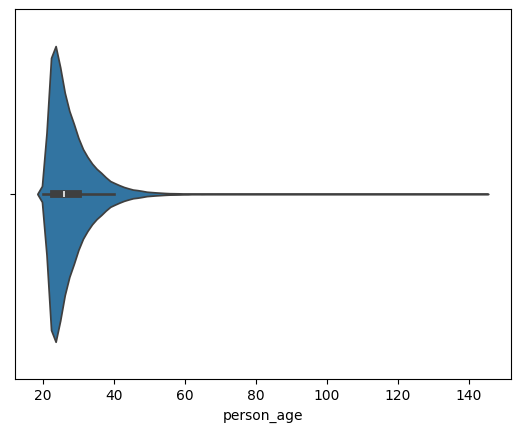

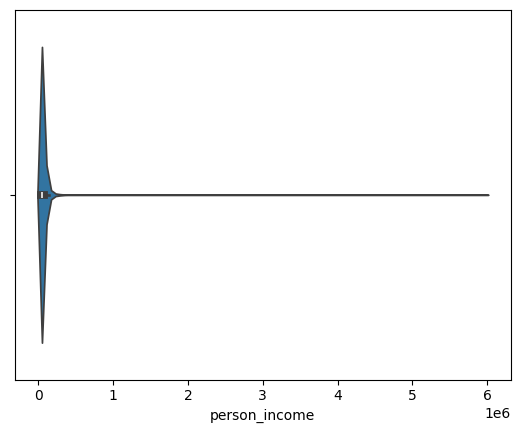

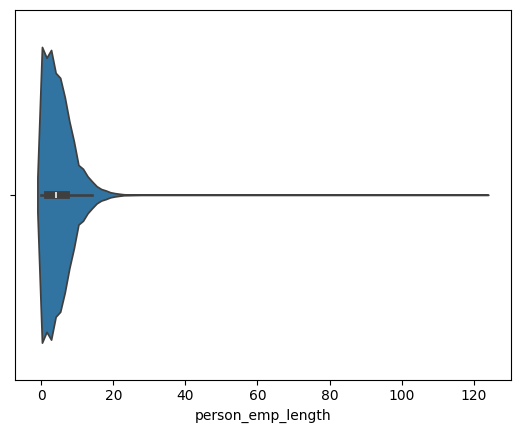

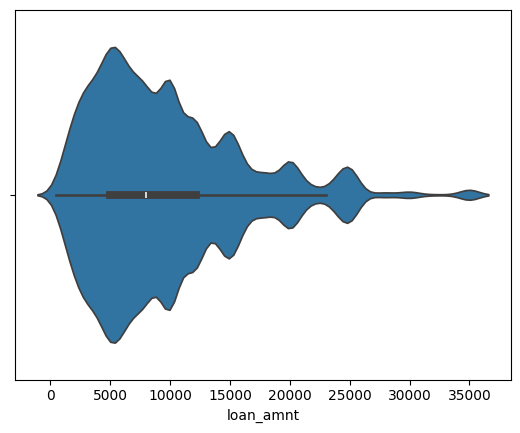

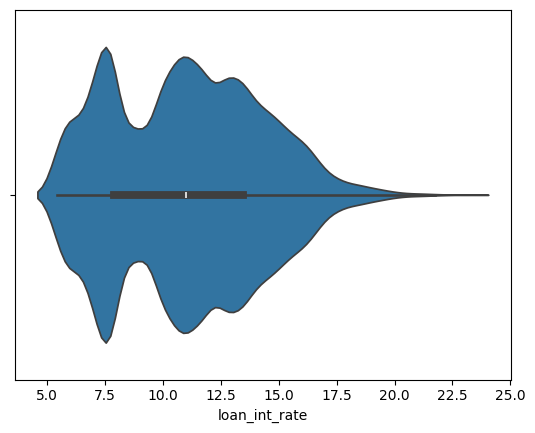

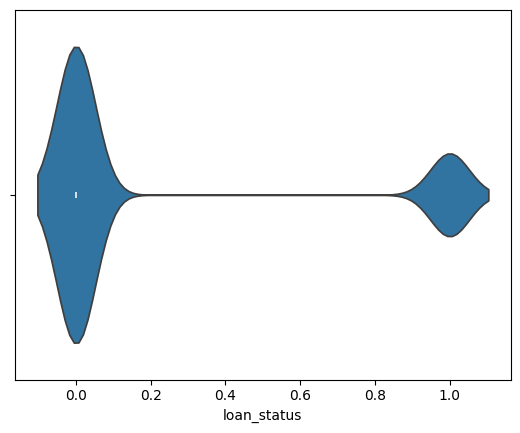

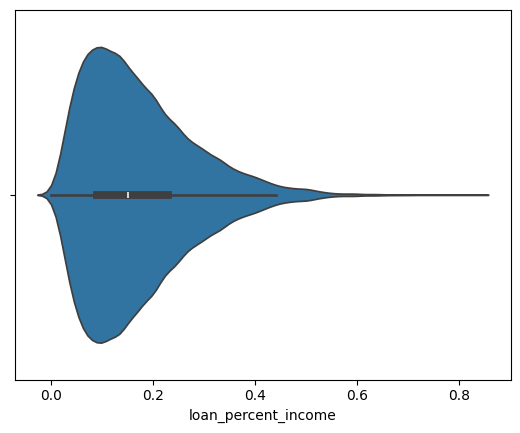

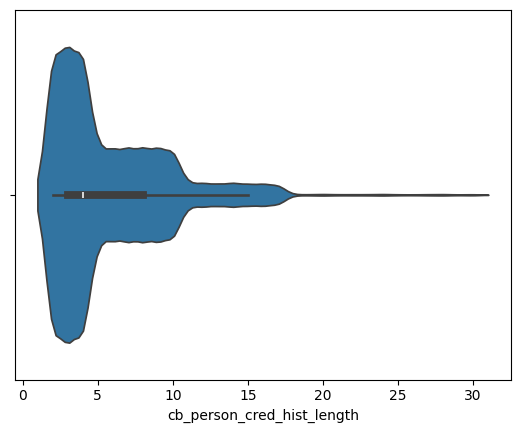

In [38]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.violinplot(df, x = col, ax = ax)

#### hist plot

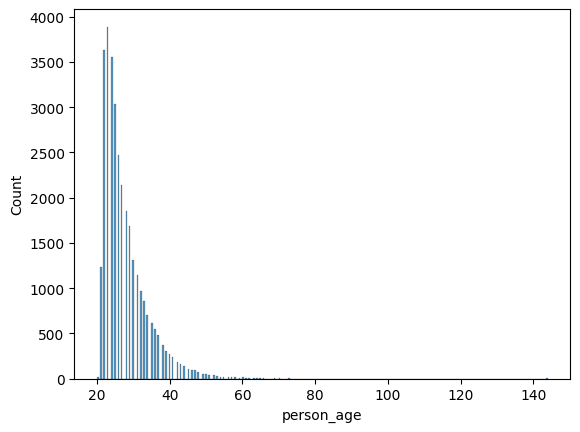

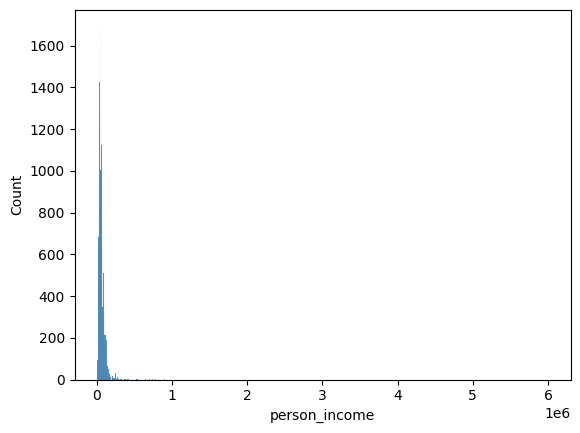

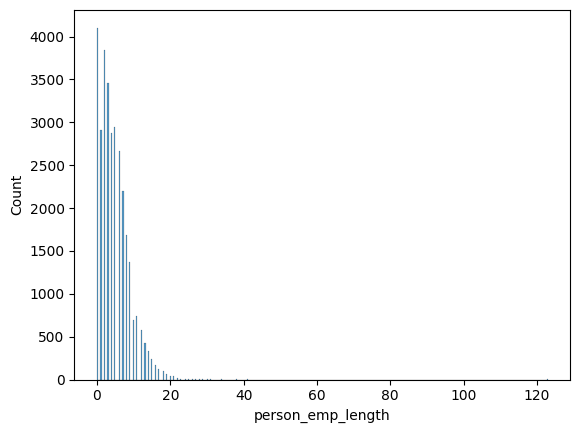

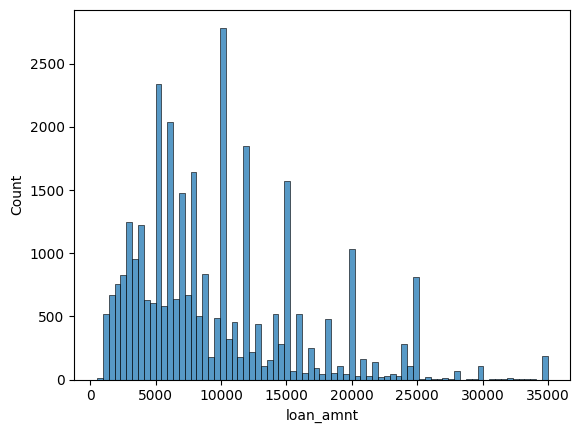

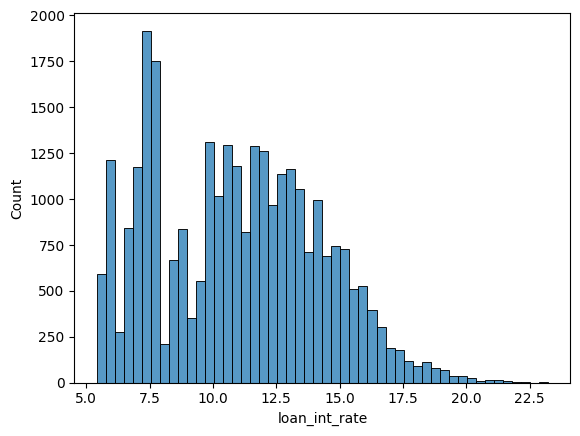

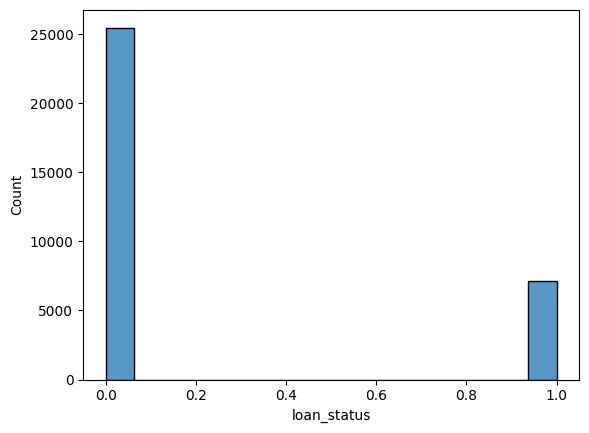

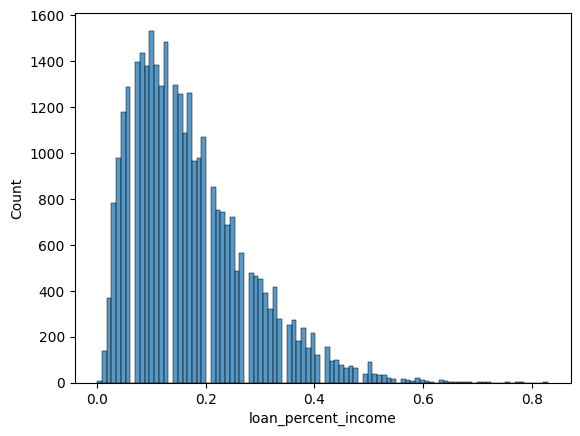

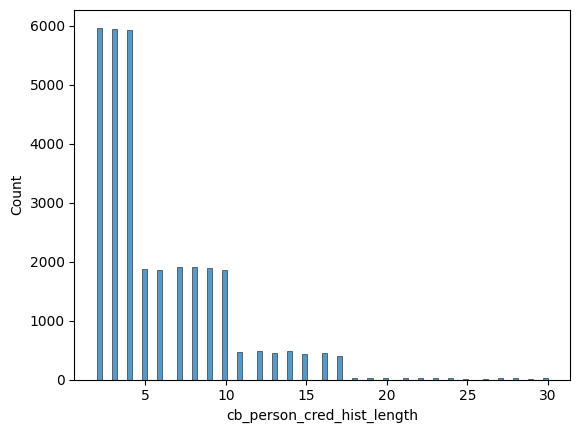

In [37]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.histplot(df, x = col, ax =ax)

### Categorical variables

In [ ]:
c_vars = [x for x in df.columns.to_list() if df[x].dtype == "object"]

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_12003/2091454085.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = "person_age", palette="coolwarm")


<Axes: xlabel='person_age'>

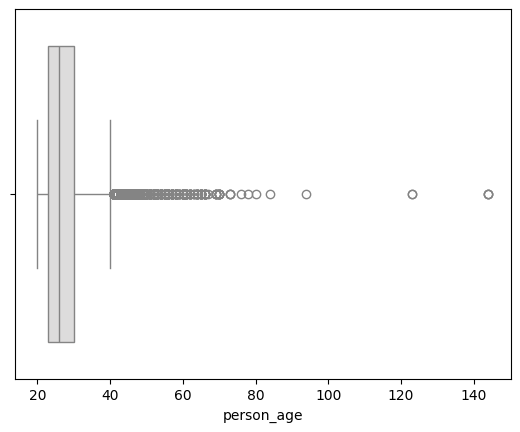

In [18]:
sns.boxplot(df, x = "person_age", palette="coolwarm")

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_12003/60724257.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x= "person_age", palette = "coolwarm")


<Axes: xlabel='person_age', ylabel='Count'>

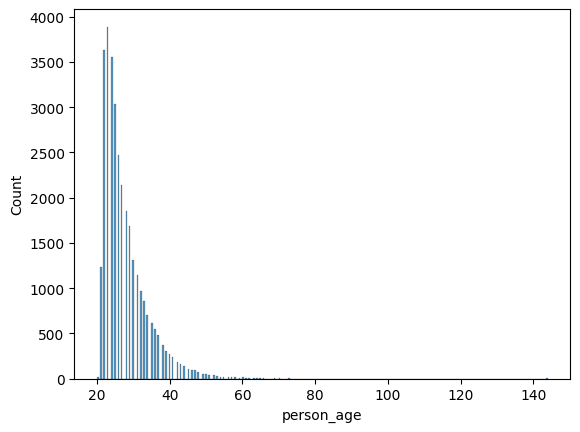

In [17]:
sns.histplot(df, x= "person_age", palette = "coolwarm")

### person_income

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_12003/2248995227.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = "person_income", palette="coolwarm")


<Axes: xlabel='person_income'>

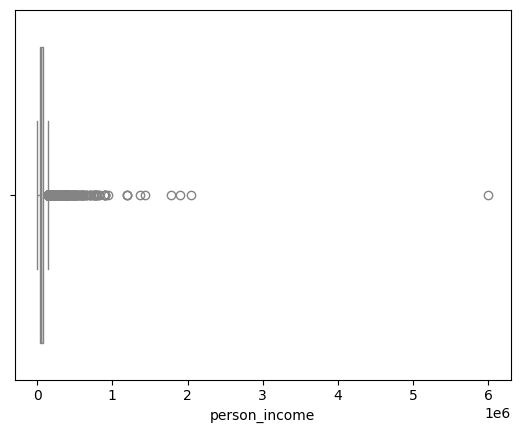

In [ ]:
sns.boxplot(df, x = "person_income", palette="coolwarm", )